# AM 205 - Assignment 3

## By Jonathan Guillotte-Blouin

In [2]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys
from scipy.integrate import quad

### Question 1: Convergence rates of two integrals

#### a) Numerically evaluate $I_A$ using the composite trapezoid rule with $n$ intervals of equal size $h$, for $n = 1, 2, ..., 50$.

In [55]:
def f(x):
    return 1/(5/4 - np.cos(x))

def composite_trapezoid(a, b, n, f):
    js = np.linspace(a, b, n+1)
    h = (b - a) / n
    
    inner_sum = 0
    for j in js:
        if j == a or j == b:
            inner_sum += f(j)/2
        else:
            inner_sum += f(j)
            
    return (h, inner_sum * h)

# compute I_A and its absolute error
a_1a = 0
b_1a = np.pi/3
real_value_1a = 8*np.pi/9
I_1A_h = []
I_1A_abserr = []
for n in range(1, 51):
    h, I_A = composite_trapezoid(a_1a, b_1a, n, f)
    I_1A_h.append(h)
    I_1A_abserr.append(abs(I_A - real_value_1a))

$$f''(x) = \frac{-\cos(x)}{(\frac{5}{4} - \cos(x))^2} + \frac{2 \sin^2(x)}{(\frac{5}{4} - \cos(x))^3}$$

In the range $0 \leq x \leq \frac{\pi}{3}$, $||f||_{\infty} = 16$. Indeed, $|f''(0)| = 16$ and $f'''(0) = 0$, so the point $x = 0$ is a local maximum. The other maximum is lesser (see next figure), so we can safely say $||f||_{\infty} = 16$.

The maximum value of f'' is 16.0


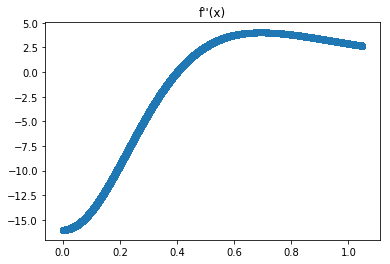

In [58]:
# f''(x)
def f2(x):
    term1 = -np.cos(x) / (5/4 - np.cos(x))**2
    term2 = 2*np.sin(x)**2 / (5/4 - np.cos(x))**3
    
    return term1 + term2

f2_domain = np.linspace(a_1a, b_1a, 100000)
plt.scatter(f2_domain, f2(f2_domain))
plt.title("f''(x)")
print("The maximum value of f'' is",  max([abs(f2(x)) for x in np.linspace(a_1a, b_1a, 100000)]))

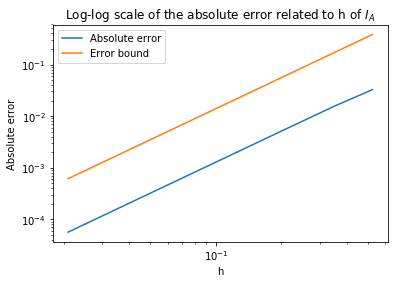

In [64]:
I_1A_errbound = [16 / 36 * np.pi * h**2 for h in I_1A_h]
plt.loglog(I_1A_h[1:], I_1A_abserr[1:], label="Absolute error") # removed the first entry, which has an error of 0
plt.loglog(I_1A_h[1:], I_1A_errbound[1:], label="Error bound") # removed the first entry, which has an error of 0
plt.title(r"Log-log scale of the absolute error related to h of $I_A$")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

We can see that the numerically computed results all have an absolute error (in blue) smaller than the error bound (in orange).

#### a) Numerically evaluate $I_B$ using the composite trapezoid rule with $n$ intervals of equal size $h$, for $n = 1, 2, ..., 50$.

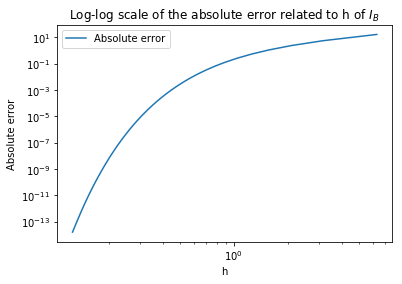

In [121]:
# compute I_B and its absolute error
a_1b = 0
b_1b = 2*np.pi
real_value_1b = 8*np.pi/3
I_1B_h = []
I_1B_abserr = []
for n in range(1, 51):
    h, I_B = composite_trapezoid(a_1b, b_1b, n, f)
    I_1B_h.append(h)
    I_1B_abserr.append(abs(I_B - real_value_1b))

plt.loglog(I_1B_h, I_1B_abserr, label="Absolute error")

plt.title(r"Log-log scale of the absolute error related to h of $I_B$")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

What the last part of the question wants to know is if the absolute error (err) scales with $ h^m$ for some $m$. So,

$$ m \stackrel{?}{=} \log_h(\texttt{err}) \, \forall \, h$$ 

All the m values computed
[  1.53367511   1.50262001   1.18062729   0.24504065  -2.69341255
 -28.71850417  18.74870843  11.2705199    9.51074703   8.84811153
   8.58083579   8.49855373   8.51646394   8.59393758   8.70915289
   8.8493957    9.0067933    9.17623547   9.3542784    9.53852975
   9.72728548   9.91930638  10.11367545  10.30970416  10.50686908
  10.7047683   10.90309044  11.10159278  11.30008495  11.49841726
  11.69647134  11.89415426  12.0913916   12.2881274   12.4843139
  12.67991291  12.87491003  13.06929679  13.26299766  13.45609057
  13.64824066  13.84009901  14.03043892  14.22180494  14.40964573
  14.60437194  14.78902499  14.9695042   15.1566986   15.31569533]


Text(0,0.5,'m')

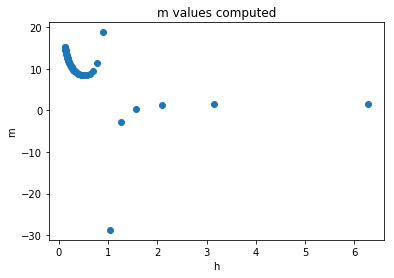

In [132]:
ms = np.log(I_1B_abserr) / np.log(I_1B_h)
print("All the m values computed")
print(ms)

plt.scatter(I_1B_h, ms, label="Absolute error")
plt.title("m values computed")
plt.xlabel("h")
plt.ylabel("m")

There does not seem to be a $m$ such that the absolute error would scale proportionally to $h^m$.

### Question 2: Adaptive integration

#### a) Derive the 3-point Gauss quadrature.



$$P_3(x) = \frac{1}{2}x(5x^2-3)$$

Our goal is to find the following quadrature: $w_1x_1 + w_2x_2 + w_3x_3$.

Let's find the roots of $P_3(x)$. $x_2 = 0$ is a trivial solution. The other roots are when $5x^2 - 3 = 0$. If we solve this equation, we will find that $x_1 = -\sqrt{\frac{3}{5}}$ and $x_3 = \sqrt{\frac{3}{5}}$.

The weights of the quadrature can be determined by hand by this integral:

$$ w_k = \int_a^b \mathcal{L}_k(x)dx \; \texttt{, where } a = -1, b = 1$$


Let's find $w_1$.

$$\mathcal{L}_1(x) = \frac{(x-0)(x-\sqrt{\frac{3}{5}})}{(-\sqrt{\frac{3}{5}})(-2\sqrt{\frac{3}{5}})} = \frac{5}{6}(x^2 - \sqrt{\frac{3}{5}}x)$$

$$w_1 = \int_{-1}^1 \frac{5}{6}(x^2 - \sqrt{\frac{3}{5}}x)dx = \frac{5}{9}$$


Let's find $w_2$.

$$\mathcal{L}_2(x) = \frac{(x+\sqrt{\frac{3}{5}})(x-\sqrt{\frac{3}{5}})}{(\sqrt{\frac{3}{5}})(-\sqrt{\frac{3}{5}})} = 1 - \frac{5}{3}x^2$$

$$w_2 = \int_{-1}^1 1 - \frac{5}{3}x^2dx = \frac{8}{9}$$


Let's find $w_3$.

$$\mathcal{L}_3(x) = \frac{(x+\sqrt{\frac{3}{5}})(x-0)}{(2\sqrt{\frac{3}{5}})(\sqrt{\frac{3}{5}})} = \frac{5}{6}(x^2 + \sqrt{\frac{3}{5}}x)$$

$$w_3 = \int_{-1}^1 \frac{5}{6}(x^2 + \sqrt{\frac{3}{5}}x)dx = \frac{5}{9}$$


The Gauss quadrature therefore is: 

$$\int_{-1}^1 f(x)dx \approx \sum_{k=1}^3 w_kf(x_k) = \frac{5}{9} f(-\sqrt{\frac{3}{5}}) + \frac{8}{9} f(0) + \frac{5}{9} f(\sqrt{\frac{3}{5}})$$

Our quadrature should work with functions up to order $2n-1$, therefore 5, over the range $[-1,1]$. Let's test this.

In [19]:
def gauss_quad(f):
    return 5/9 * f(-np.sqrt(3/5)) + 8/9 * f(0) + 5/9 * f(np.sqrt(3/5))
    
one_2a = lambda _:  1
twoX_2a = lambda x: 2*x
x2_2a = lambda x: x**2
x3_2a = lambda x: 16 * x**3 + 1
x4_2a = lambda x: x**4
x5_2a = lambda x: x**5
x6_2a = lambda x: x**6

print("The result on the left is obtained using `scipy.integrate.quad`; on the right is the Gauss quadrature we derived.")
print("Test with f(x) = 1: ", quad(one_2a, -1, 1)[0], gauss_quad(one_2a))
print("Test with f(x) = 2x: ", quad(twoX_2a, -1, 1)[0], gauss_quad(twoX_2a))
print("Test with f(x) = x^2: ", quad(x2_2a, -1, 1)[0], gauss_quad(x2_2a))
print("Test with f(x) = 16x^3 + 1: ", quad(x3_2a, -1, 1)[0], gauss_quad(x3_2a))
print("Test with f(x) = x^4: ", quad(x4_2a, -1, 1)[0], gauss_quad(x4_2a))
print("Test with f(x) = x^5: ", quad(x5_2a, -1, 1)[0], gauss_quad(x5_2a))

# test, but should not work (degree 6)
print("\nThe following test should not work, as we are testing a function of degree 6.")
print("Test with f(x) = x^6: ", quad(x6_2a, -1, 1)[0], gauss_quad(x6_2a))

The result on the left is obtained using `scipy.integrate.quad`; on the right is the Gauss quadrature we derived.
Test with f(x) = 1:  2.0 2.0
Test with f(x) = 2x:  0.0 0.0
Test with f(x) = x^2:  0.6666666666666666 0.666666666667
Test with f(x) = 16x^3 + 1:  2.0 2.0
Test with f(x) = x^4:  0.4 0.4
Test with f(x) = x^5:  0.0 0.0

The following test should not work, as we are testing a function of degree 6.
Test with f(x) = x^6:  0.2857142857142857 0.24


#### b) Write a function to implement adaptive integration. Try on $\int_{-1}^{\frac{5}{4}} x^m - x^2 + 1 dx$, for $m = 4, 5, 6, 7, 8$.

In [20]:
# Here, I rewrote the Gauss quadrature to be more general.
# It takes the interval [a,b] rather than integrating simply over [-1, 1].
# It takes as well a list of 2-tuples, which we can provide Gauss quadrature with a variable number of points.
def gauss_quad_any(f, a, b, weight_points):
    int_sum = 0

    for weight, point in weight_points:
        t = ((b-a) * point + a + b) / 2
        int_sum += weight * f(t)
    
    return (b-a) / 2 * int_sum

three_point_quad = [
    (5/9, -np.sqrt(3/5)),
    (8/9, 0),
    (5/9, np.sqrt(3/5))
]

# I did not calculate the points for the five-point quadrature, I copied them from a table 
five_point_quad = [
    ((322 - 13 * np.sqrt(70)) / 900, -1/3 * np.sqrt(5 + 2 * np.sqrt(10/7))),
    ((322 + 13 * np.sqrt(70)) / 900, -1/3 * np.sqrt(5 - 2 * np.sqrt(10/7))),
    (128/225, 0),
    ((322 + 13 * np.sqrt(70)) / 900, 1/3 * np.sqrt(5 - 2 * np.sqrt(10/7))),
    ((322 - 13 * np.sqrt(70)) / 900, 1/3 * np.sqrt(5 + 2 * np.sqrt(10/7)))
]

print("Test with f(x) = x^6: ", quad(x6_2a, -1, 5/4)[0], gauss_quad_any(x6_2a, -1, 5/4, five_point_quad))

Test with f(x) = x^6:  0.8240530831473214 0.824053083147


With this general form of the Gauss quadrature, using a 5-point scheme, we can now integrate over all intervals for functions of order up to 9, which will satisfy the constraints of $m$ for this problem.

In [86]:
def generate_f_2b(m):
    return lambda x: x**m - x**2 + 1

def adaptive_int(f, a, b, x_point_quad, T=1e-6):
    c = (a+b) / 2
    l = b - a
    Iab = gauss_quad_any(f, a, b, x_point_quad)
    Iac = gauss_quad_any(f, a, c, x_point_quad)
    Icb = gauss_quad_any(f, c, b, x_point_quad)
    
    err = abs(Iab - (Iac + Icb))
    if err < T * l:
        return Iab, err, 1
    
    left_int, left_err, left_interval = adaptive_int(f, a, c, x_point_quad)
    right_int, right_err, right_interval = adaptive_int(f, c, b, x_point_quad)
    
    return left_int + right_int, left_err + right_err, left_interval + right_interval

In [89]:
for m in range(4, 9):
    f = generate_f_2b(m)
    
    adaptive_result = adaptive_int(f, -1, 5/4, three_point_quad)
    five_point_result = gauss_quad_any(f, -1, 5/4, five_point_quad)
    scipy_result = quad(f, -1, 5/4)
    
    print("m =", m)
    print("Adaptive three point: {}, with error {}, split into {} intervals".format(adaptive_result[0], adaptive_result[1], adaptive_result[2]))
    print("Gauss five point:     {}".format(five_point_result))
    print("Scipy `quad`:         {}".format(scipy_result[0]))
    print()

m = 4
Adaptive three point: 2.0759765624999997, with error 0.0, split into 1 intervals
Gauss five point:     2.0759765625
Scipy `quad`:         2.0759765625

m = 5
Adaptive three point: 1.7347412109375, with error 0.0, split into 1 intervals
Gauss five point:     1.7347412109375
Scipy `quad`:         1.7347412109374998

m = 6
Adaptive three point: 2.0896776854252677, with error 3.9150764696849194e-07, split into 8 intervals
Gauss five point:     2.0896780831473216
Scipy `quad`:         2.089678083147321

m = 7
Adaptive three point: 1.8856830810179943, with error 5.984088285136691e-07, split into 11 intervals
Gauss five point:     1.8856830596923828
Scipy `quad`:         1.8856830596923828

m = 8
Adaptive three point: 2.2045781012757355, with error 2.934550760169685e-07, split into 13 intervals
Gauss five point:     2.2045783996582027
Scipy `quad`:         2.204578399658203



#### c) Use the adaptive integration scheme to evaluate three new integrals

In [92]:
# f(x) = |x| over [-1,1]
adaptive_result_abs = adaptive_int(abs, -1, 1, three_point_quad)
five_point_result_abs = gauss_quad_any(abs, -1, 1, five_point_quad)
scipy_result_abs = quad(abs, -1, 1)

print("f(x) = |x| over [-1,1]")
print("Adaptive three point: {}, with error {}, split into {} intervals".format(adaptive_result_abs[0], adaptive_result_abs[1], adaptive_result_abs[2]))
print("Gauss five point:     {}".format(five_point_result_abs))
print("Scipy `quad`:         {}".format(scipy_result_abs[0]))
print()


# f(x) = |x| over [-1, 2]
adaptive_result_abs2 = adaptive_int(abs, -1, 2, three_point_quad)
five_point_result_abs2 = gauss_quad_any(abs, -1, 2, five_point_quad)
scipy_result_abs2 = quad(abs, -1, 2)

print("f(x) = |x| over [-1,2]")
print("Adaptive three point: {}, with error {}, split into {} intervals".format(adaptive_result_abs2[0], adaptive_result_abs2[1], adaptive_result_abs2[2]))
print("Gauss five point:     {}".format(five_point_result_abs2))
print("Scipy `quad`:         {}".format(scipy_result_abs2[0]))
print()


# f(x) = x^(3/4) sin(1/x) over [0, 1]
xsinx = lambda x: x**(3/4) * np.sin(1/x)

adaptive_result_xsinx = adaptive_int(xsinx, 0, 1, three_point_quad)
five_point_result_xsinx = gauss_quad_any(xsinx, 0, 1, five_point_quad)
scipy_result_xsinx = quad(xsinx, 0, 1, full_output=1)

print("f(x) = x^(3/4) sin(1/x) over [0, 1]")
print("Adaptive three point: {}, with error {}, split into {} intervals".format(adaptive_result_xsinx[0], adaptive_result_xsinx[1], adaptive_result_xsinx[2]))
print("Gauss five point:     {}".format(five_point_result_xsinx))
print("Scipy `quad`:         {}".format(scipy_result_xsinx[0]))
print()

f(x) = |x| over [-1,1]
Adaptive three point: 1.0, with error 0.0, split into 2 intervals
Gauss five point:     0.9448504363990782
Scipy `quad`:         1.0

f(x) = |x| over [-1,2]
Adaptive three point: 2.500000000096074, with error 7.20552679410032e-11, split into 16 intervals
Gauss five point:     2.5525801485645925
Scipy `quad`:         2.5

f(x) = x^(3/4) sin(1/x) over [0, 1]
Adaptive three point: 0.4070268678505241, with error 2.12949887557918e-07, split into 194326 intervals
Gauss five point:     0.37569667525528055
Scipy `quad`:         0.4070272820333413



### Question 3: Integration of a family of functions

#### a) Plot $g(x;\frac{1}{3})$ on the interval $[\frac{-1}{2}, \frac{1}{2}]$.

In [128]:
from sys import exit

# This function returns a function that implements the core functionality.
# Rather than call g(x, phi), we call g(phi)(x).
# This subtlety is necessary in 3b.
def g(phi):
    if phi <= 0 or phi >= 1:
        print("phi is out of range:", phi)
        exit()
    
    def gx(x):
        if x < -1/2 or x > 1/2:
            print("x is out of range:", x)
            exit()
            
        result = abs(x)
        is_terminated = False
        k = 1
        while not is_terminated:
            phik = phi**k

            if phik < 1e-16:
                is_terminated = True

            result = abs(result - phik)
            k += 1

        return result
            
    return gx    

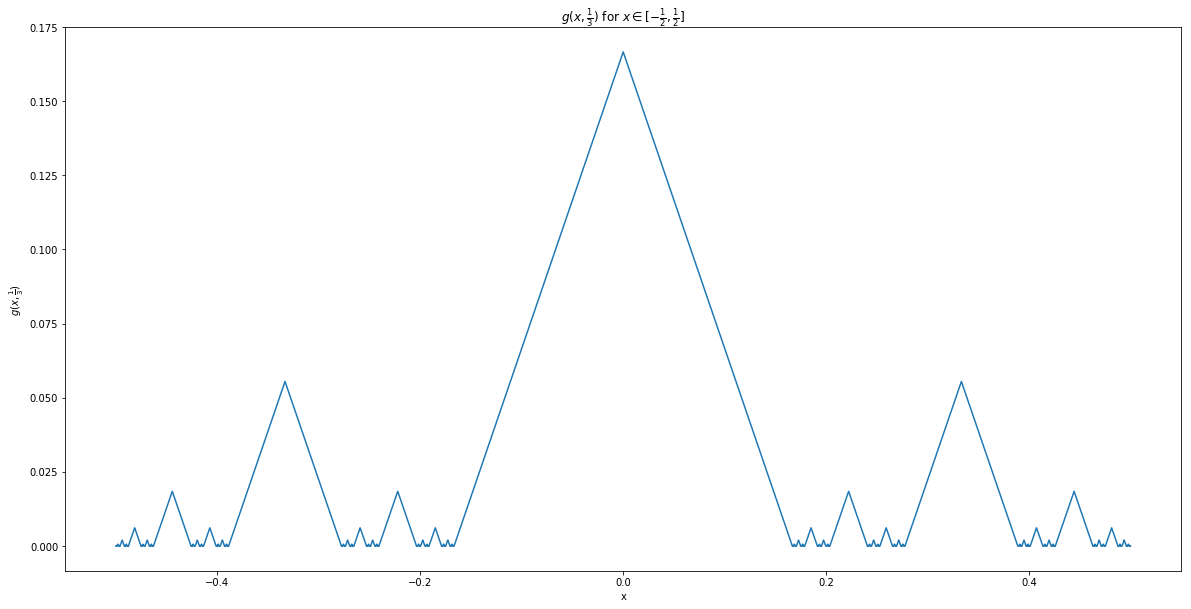

In [138]:
x_q3 = np.linspace(-1/2, 1/2, 10000)

plt.figure(figsize=(20,10))
plt.plot(x_q3, [g(1/3)(x) for x in x_q3])
plt.xlabel("x")
plt.ylabel(r"$g(x, \frac{1}{3})$")
_ = plt.title(r"$g(x, \frac{1}{3})$ for $x \in [-\frac{1}{2}, \frac{1}{2}]$")

#### b) Make a plot of $I(\phi)$ for $\phi \in (0,1)$. Approximately what range of values of $\phi$ require the most intervals?

In [152]:
phi_q3 = np.linspace(0.01, 0.99, 99)

q3b_Iphi = []
q3b_intervals = []
for phi in phi_q3:
    Iphi, _, intervals = adaptive_int(g(phi), -1/2, 1/2, three_point_quad)
    q3b_Iphi.append(Iphi)
    q3b_intervals.append(intervals)

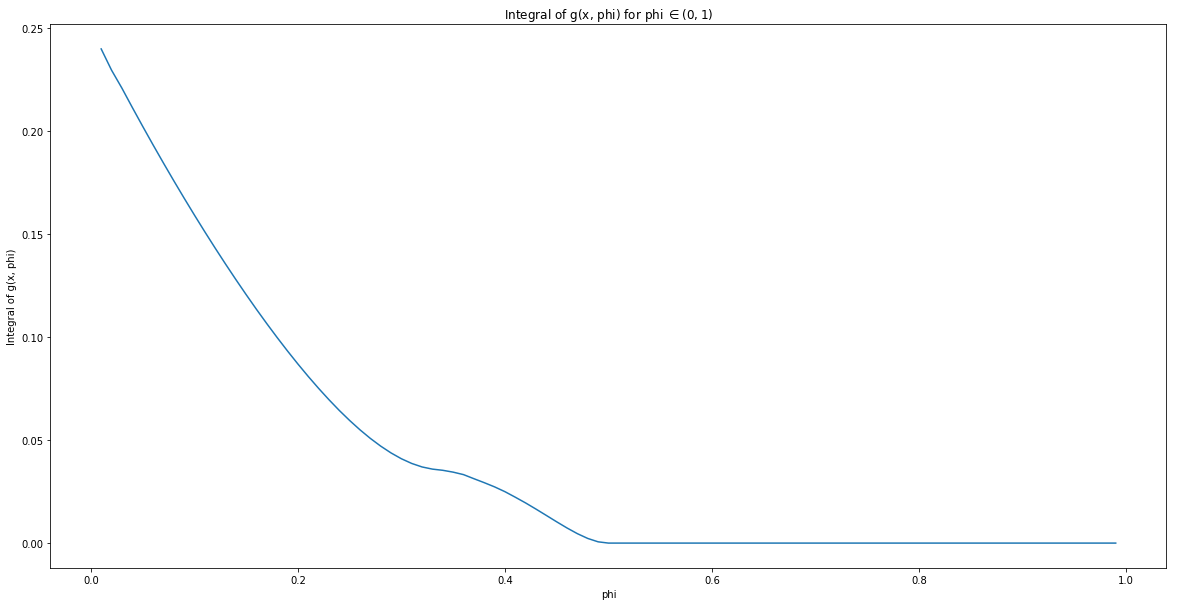

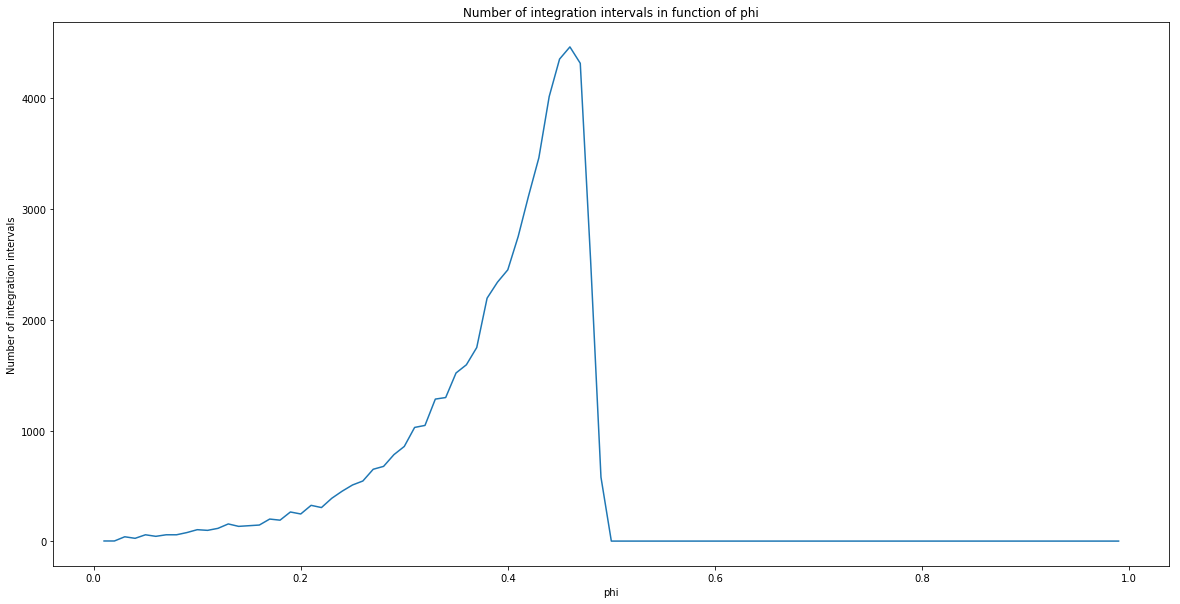

In [153]:
plt.figure(figsize=(20,10))
plt.plot(phi_q3, q3b_Iphi)
plt.title(r"Integral of g(x, phi) for phi $\in (0,1)$")
plt.xlabel("phi")
plt.ylabel("Integral of g(x, phi)")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(phi_q3, q3b_intervals)
plt.title("Number of integration intervals in function of phi")
plt.xlabel("phi")
_ = plt.ylabel("Number of integration intervals")

The maximum number of integration intervals is approximately within the range of phi between 0.43 and 0.48.

### Question 4: Error analysis of a numerical integration rule

#### a) Show that the order of accuracy of this method is 2.

$$ y_{k+1} = y_k + h f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right) $$

Let's expand $y_{k+1}$ around $t_{k+\frac{1}{2}}$.

$$y_{k+1} = y_{k+\frac{1}{2}} + y'_{k+\frac{1}{2}} (t_{k+1} - t_{k+\frac{1}{2}}) + \frac{y''_{k+\frac{1}{2}} (t_{k+1} - t_{k+\frac{1}{2}})^2}{2} + \frac{y'''_{k+\frac{1}{2}} (t_{k+1} - t_{k+\frac{1}{2}})^3}{3!} + ...$$

We know that $t_{k+1} - t_{k+\frac{1}{2}} = \frac{h}{2}$.

$$y_{k+1} = y_{k+\frac{1}{2}} + y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} + \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ...$$



Now, let's expand $y_{k}$ around $t_{k+\frac{1}{2}}$.

$$y_k = y_{k+\frac{1}{2}} + y'_{k+\frac{1}{2}} (t_k - t_{k+\frac{1}{2}}) + \frac{y''_{k+\frac{1}{2}} (t_k - t_{k+\frac{1}{2}})^2}{2} + \frac{y'''_{k+\frac{1}{2}} (t_k - t_{k+\frac{1}{2}})^3}{3!} + ...$$

We know that $t_k - t_{k+\frac{1}{2}} = -\frac{h}{2}$.

$$y_k = y_{k+\frac{1}{2}} - y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} - \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ...$$


Therefore,

$$\frac{y_{k+1} - y_k}{h} = \frac{\left[y_{k+\frac{1}{2}} + y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} + \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ... \right] - \left[ y_{k+\frac{1}{2}} - y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} - \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ...\right]}{h}$$

$$\frac{y_{k+1} - y_k}{h} = y'_{k+\frac{1}{2}} + \frac{y'''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 3!} + ...$$


Now, let's expand $f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right)$ around $t_{k+\frac{1}{2}}$. For simplicity, we'll define $f_{k+\frac{1}{2}} = f\left(t_{k+\frac{1}{2}}, y_{k+\frac{1}{2}}\right)$.

$$f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right) = f_{k+\frac{1}{2}} + \frac{\partial f_{k+\frac{1}{2}}}{\partial t} \left(t_{k+\frac{1}{2}} - t_{k+\frac{1}{2}}\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y_k + y_{k+1}}{2} - y_{k+\frac{1}{2}}\right) 
+ \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 t \cdot 2} \left(t_{k+\frac{1}{2}} - t_{k+\frac{1}{2}}\right)^2 + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y_k + y_{k+1}}{2} - y_{k+\frac{1}{2}}\right)^2 + ...$$

The partial derivatives relative to $t$ are irrelevant, as the factor after that $\left(t_{k+\frac{1}{2}} - t_{k+\frac{1}{2}}\right)$ will always give 0.

$$f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right) = f_{k+\frac{1}{2}} + \frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y_k + y_{k+1}}{2} - y_{k+\frac{1}{2}}\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y_k + y_{k+1}}{2} - y_{k+\frac{1}{2}}\right)^2 + ...$$


Now, let's find $\frac{y_k + y_{k+1}}{2}$.

$$\frac{y_{k+1} + y_k}{2} = \frac{\left[y_{k+\frac{1}{2}} + y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} + \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ... \right] + \left[ y_{k+\frac{1}{2}} - y'_{k+\frac{1}{2}} (\frac{h}{2}) + \frac{y''_{k+\frac{1}{2}} (\frac{h}{2})^2}{2} - \frac{y'''_{k+\frac{1}{2}} (\frac{h}{2})^3}{3!} + ...\right]}{2}$$

$$\frac{y_{k+1} + y_k}{2} = y'_{k+\frac{1}{2}} + \frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...$$



$f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right)$ can be rewritten as

$$f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right) = f_{k+\frac{1}{2}} + \frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right)^2 + ...$$


We know that $f_{k+\frac{1}{2}} = y'_{k+\frac{1}{2}}$.

$$f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right) = y'_{k+\frac{1}{2}} + \frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right)^2 + ...$$

We have all the pieces required now to derive the order of accuracy.

$$\texttt{Error} = \frac{y_{k+1} - y_k}{h} - f\left(t_{k+\frac{1}{2}}, \frac{y_k + y_{k+1}}{2}\right)$$

$$ = \left[y'_{k+\frac{1}{2}} + \frac{y'''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 3!} + ...\right] - \left[y'_{k+\frac{1}{2}} + \frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right)^2 + ...\right]$$

$$ = \left[\frac{y'''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 3!} + ...\right] - \left[\frac{\partial f_{k+\frac{1}{2}}}{\partial y} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right) + \frac{\partial f_{k+\frac{1}{2}}}{\partial^2 y \cdot 2} \left(\frac{y''_{k+\frac{1}{2}} \cdot h^2}{4 \cdot 2!} + ...\right)^2 + ...\right]$$

The significant factor of both terms is $h^2$, so we can rewrite this with the following order:

$$ = O(h^2) - O(h^2) = O(h^2)$$

The order of accuracy of this method is therefore of 2.

### Question 6: Asteroid collision

#### a) Write the system of ODEs to be solved in terms of $x$, $y$, $u$, and $v$.

* x

$$x' = \frac{-1}{2} \frac{\partial J}{\partial u} = \frac{-1}{2} (-2u) = u$$

* y

$$y' = \frac{-1}{2} \frac{\partial J}{\partial v} = \frac{-1}{2} (-2v) = v$$

* u

$$u' = v + \frac{1}{2} \frac{\partial}{\partial x} \left((x-\mu)^2 + \frac{2(1-\mu)}{\sqrt{x^2+y^2}} + \frac{2\mu}{\sqrt{(x-1)^2+y^2}}\right)$$

$$u' = v + \frac{1}{2} \left( 2(x - \mu) - \frac{2(1-\mu)x}{(x^2 + y^2)^{3/2}} - \frac{2\mu(x-1)}{((x-1)^2 + y^2)^{3/2}} \right)$$

$$u' = v + x - \mu - \frac{(1-\mu)x}{(x^2 + y^2)^{3/2}} - \frac{\mu(x-1)}{((x-1)^2 + y^2)^{3/2}}$$

* v

$$v' = -u + \frac{1}{2} \frac{\partial}{\partial y} \left(y^2 + \frac{2(1-\mu)}{\sqrt{x^2+y^2}} + \frac{2\mu}{\sqrt{(x-1)^2+y^2}}\right)$$

$$v' = -u + \frac{1}{2} \left( 2y - \frac{2(1-\mu)y}{(x^2 + y^2)^{3/2}} - \frac{2\mu y}{((x-1)^2 + y^2)^{3/2}} \right)$$

$$v' = -u + y - \frac{(1-\mu)y}{(x^2 + y^2)^{3/2}} - \frac{\mu y}{((x-1)^2 + y^2)^{3/2}}$$

#### b) Write a program that determines whether a line segment from $x_0 = (x_0, y_0)$ to $x_1 = (x_1, y_1)$ intersects a circle of radius $R$ centered at $(0,0)$.

In [70]:
def is_segment_circle_intersect(R, x0, y0, x1, y1):
    # special case: would lead to division by 0 to compute the slope of the segment, so solve this case independently
    if x1 == x0:
        rx = R**2 - x0**2
        if rx < 0:
            return False # the line supporting the segment never crosses the circle

        y = np.sqrt(rx)
        
        # here, we know that the supporting line crosses the circle, but does the specific segment as well?
        if (y0 < -y and y1 < -y) or (y0 > y and y1 > y):
            return False
        
        return True
    
    m = (y1-y0) / (x1-x0)
    b = y0 - m * x0
    
    r1, r2 = np.roots([1+m**2, 2*b*m, -(R**2-b**2)])

    if type(r1) == np.complex128:
        return False # the line supporting the segment never crosses the circle
    
    # here, we know that the supporting line crosses the circle, but does the specific segment as well?
    if (r1 >= min(x0, x1) and r1 <= max(x0, x1)) or ((r2 >= min(x0, x1) and r2 <= max(x0, x1))):
        return True
    
    return False

*How did I come up with this?*

The idea is to find the coordinates where a circle $x^2 + y^2 = R^2 \implies y = \sqrt{R^2 - x^2}$ intersects a line $y = mx + b$. Therefore, we want to solve:

$$\sqrt{R^2 - x^2} = mx + b$$

If we reduce this, we get

$$0 = (1+m^2)x^2 + (2bm)x - (R^2 - b^2)$$

When we solve this quadratic, there are two possibilities:
* **there are no real roots**: this means that the supporting line never crosses the circle
* **there are real roots (numpy always returns 2 of them, even though they may be duplicates)**: the supporting line intersects the circle

Even though the supporting line intersects the circle, that is not necessarily the case for the specific segment; a last step is to make sure that either root is within the domain of the segment.

Note that there is a special case to handle: if $x_0 = x_1$, then the slope is undefined (division by 0). Hence, the first part of the algorithm checks for that case. It finds $\pm\sqrt{R^2 - x^2}$ for that $x = x_0 = x_1$, and determines whether either results are within the co-domain of the segment.

#### c) Integrate the system from part a) for ten initial conditions. Make a figure showing the Earth, Moon, and the ten trajectories computed.

In [27]:
from scipy.integrate import odeint

def ODE_trajectories(n):
    mu = 0.01 # ratio of moon mass to moon+earth mass
    
    # generate 10 initial conditions
    x0s = np.random.normal(1.0798, 0.002, n)
    y0s = np.random.normal(0, 0.002, n)
    x002s = np.random.normal(1.0802, 0.002, n)
    y002s = np.random.normal(-0.0189, 0.002, n)
    
    # part a) ODEs
    def get_trajectory(params, _, mu):
        x, y, u, v = params
        
        # x', y', u', v'
        dydt = [u, v]
        dydt.append(v + x - mu - (1-mu) * x / (x**2 + y**2)**(3/2) - mu * (x-1) / ((x-1)**2 + y**2)**(3/2))
        dydt.append(-u + y - (1-mu) * y / (x**2 + y**2)**(3/2) - mu * y / ((x-1)**2 + y**2)**(3/2))
        
        return dydt
    
    t = np.linspace(0, 10, 1000)
    trajectories = []
    # solve the defined ODEs with 10 different initial conditions
    for i in range(n):
        x0, y0, x002, y002 = x0s[i], y0s[i], x002s[i], y002s[i]
        # we assume that the speed at t=0 is the difference between the positions at t=0 and t=0.02s
        u0 = (x002 - x0) / 0.02
        v0 = (y002 - y0) / 0.02
        
        trajectories.append(odeint(get_trajectory, [x0, y0, u0, v0], t, args=(mu,)))
        
    return np.array(trajectories)
            
# call ODE solver
trajectories10 = ODE_trajectories(10)

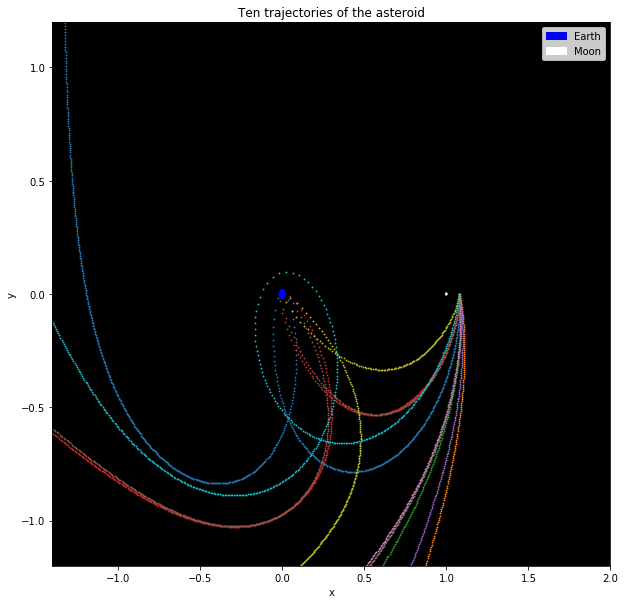

In [66]:
# plot
import matplotlib.patches as mpatches

plt.figure(figsize=(10,10))

earth = plt.Circle((0, 0), 0.02, color='b')
moon = plt.Circle((1, 0), 0.005, color='white')

ax = plt.gca()
ax.set_xlim((-1.4, 2))
ax.set_ylim((-1.2, 1.2))
ax.set_facecolor('black')

ax.add_artist(earth)
ax.add_artist(moon)

for trajectory in trajectories10:
    plt.scatter(trajectory[:,0], trajectory[:,1], marker='*', s=1)
    
earth_patch = mpatches.Patch(color='blue', label='Earth')
moon_patch = mpatches.Patch(color='white', label='Moon')
plt.legend(handles=[earth_patch, moon_patch])
plt.title("Ten trajectories of the asteroid")
plt.xlabel("x")
_ = plt.ylabel("y")

#### d)  Calculate the probabilities of the asteroid colliding with Earth or the moon (simulate 2500 trajectories).

In [30]:
trajectories2500 = ODE_trajectories(2500)

/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Progress:

After 100 trajectories, we have 24 earth crashes, and 0 moon crashes
After 200 trajectories, we have 47 earth crashes, and 0 moon crashes
After 300 trajectories, we have 71 earth crashes, and 0 moon crashes
After 400 trajectories, we have 102 earth crashes, and 0 moon crashes
After 500 trajectories, we have 121 earth crashes, and 0 moon crashes
After 600 trajectories, we have 143 earth crashes, and 0 moon crashes
After 700 trajectories, we have 173 earth crashes, and 0 moon crashes
After 800 trajectories, we have 194 earth crashes, and 0 moon crashes
After 900 trajectories, we have 219 earth crashes, and 0 moon crashes
After 1000 trajectories, we have 239 earth crashes, and 0 moon crashes
After 1100 trajectories, we have 266 earth crashes, and 0 moon crashes
After 1200 trajectories, we have 281 earth crashes, and 0 moon crashes
After 1300 trajectories, we have 303 earth crashes, and 0 moon crashes
After 1400 trajectories, we have 328 earth crashes, and 0 moon crashes
After 1

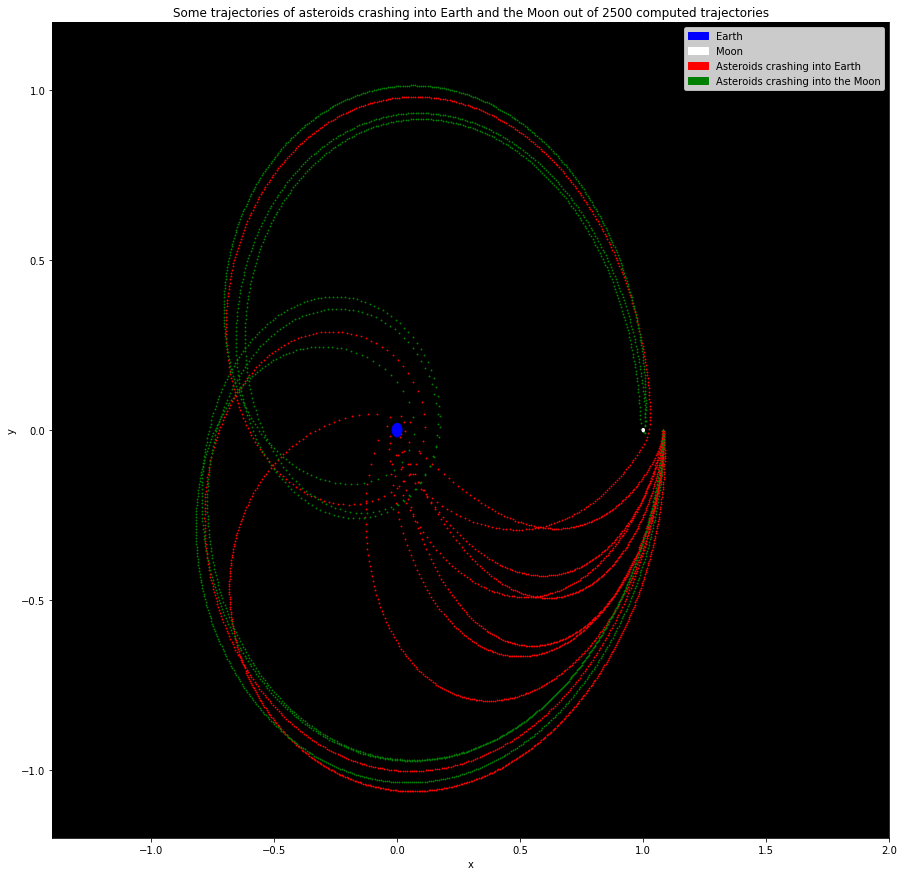

In [74]:
def is_asteroid_crashing(xs, ys):
    for i in range(1, len(xs)):
        # `is_segment_circle_intersect` assumes that the circle is centered at (0,0)
        # this is fine for the Earth, but the moon is at (1,0).
        # Therefore, the relative position of the asteroid to the moon is decremented by 1 (only in the x-axis) 
        xk_earth, xk1_earth, xk_moon, xk1_moon = xs[i-1], xs[i], xs[i-1] - 1, xs[i] - 1 
        yk, yk1 = ys[i-1], ys[i]
        
        # crashes into earth
        if is_segment_circle_intersect(0.02, xk_earth, yk, xk1_earth, yk1):
            return "earth", i
        # crashes into the Moon
        if is_segment_circle_intersect(0.005, xk_moon, yk, xk1_moon, yk1):
            return "moon", i
        
    return False, 0

# plotting configs
plt.figure(figsize=(15,15))

ax = plt.gca()
ax.set_xlim((-1.4, 2))
ax.set_ylim((-1.2, 1.2))
ax.set_facecolor('black')

earth = plt.Circle((0, 0), 0.02, color='b')
moon = plt.Circle((1, 0), 0.005, color='w')

ax.add_artist(earth)
ax.add_artist(moon)

earth_asteroid_patch = mpatches.Patch(color='r', label='Asteroids crashing into Earth')
moon_asteroid_patch = mpatches.Patch(color='g', label='Asteroids crashing into the Moon')
plt.legend(handles=[earth_patch, moon_patch, earth_asteroid_patch, moon_asteroid_patch])
plt.title("Some trajectories of asteroids crashing into Earth and the Moon out of 2500 computed trajectories")
plt.xlabel("x")
_ = plt.ylabel("y")

# go through the 2500 trajectories, calculate all of those crashing
moon_crashes = 0
earth_crashes = 0
print("Progress:\n")
for i, trajectory in enumerate(trajectories2500):        
    crash_result, crash_pos = is_asteroid_crashing(trajectory[:,0], trajectory[:,1])
    if crash_result == "earth":
        earth_crashes += 1
        
        if earth_crashes < 10:
            plt.scatter(trajectory[:crash_pos+1, 0], trajectory[:crash_pos+1, 1], marker='*', s=1, color='r')

    if crash_result == "moon":
        moon_crashes += 1
        
        if moon_crashes < 10:
            plt.scatter(trajectory[:crash_pos+1, 0], trajectory[:crash_pos+1, 1], marker='*', s=1, color='g')

    if i != 0 and (i+1) % 100 == 0:
        print("After {} trajectories, we have {} earth crashes, and {} moon crashes".format(i+1, earth_crashes, moon_crashes))

From the sampling population of 2500 trajectories, 568 crashed into Earth, and 3 into the Moon. We can estimate that the probability of such observed asteroid crashing into Earth is 22.72%; the probability of crashing into the Moon first is 0.12%.